# Data Visualization Project
## Andrew Cobble
### Last edited 10/27/2023


### Install arcgis if necessary 

In [1]:
# Run in ARCGIS for GIS mapping
#pip install arcgis

In [2]:
from arcgis.gis import GIS
gis = GIS("home")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
%matplotlib inline

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as akc170003@utdallas.edu_UTDEPPS with an administrator role, proceed with caution.
  warnings.warn(


### Diplaying Covid-19 deaths in Texas using GIS

In [3]:
FWmap = gis.map("downtown Fort Worth, TX")
FWmap

MapView(layout=Layout(height='400px', width='100%'))

In [4]:
from arcgis.features import FeatureLayer
flayer_search_result = gis.content.search(query="COVID-19 Cases US", outside_org= True)
flayer_search_result

[<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>,
 <Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Dashboard Coronavirus COVID-19 (Mobile)" type:Dashboard owner:CSSE_covid19>,
 <Item title:".09_Reopening The US Amidst The COVID-19 Outbreak" type:StoryMap owner:mgersh_pdxedu>,
 <Item title:"Coronavirus COVID-19 Cases V2" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Coronavirus COVID-19 Cases" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"U.S. States and Territories for COVID-19 Trends Story Map" type:Feature Layer Collection owner:cfrye_UO>,
 <Item title:"COVID-19" type:Web Map owner:edong1_GISandData>,
 <Item title:"COVID-19 Vulnerability Index (Deprecated)" type:Feature Layer Collection owner:FairfaxCounty>,
 <Item title:"COVID-19 Trends for U.S. Counties" type:Web Mapping Application owner:cfrye_UO>]

In [5]:
# Object containing all the feature layers in the map
flayer = flayer_search_result[1].layers[0]
flayer

<FeatureLayer url:"https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0">

In [6]:
for f in flayer.properties.fields:
    print(f.name)

OBJECTID
Province_State
Country_Region
Last_Update
Lat
Long_
Confirmed
Recovered
Deaths
Active
Admin2
FIPS
Combined_Key
Incident_Rate
People_Tested
People_Hospitalized
UID
ISO3


In [7]:
covid_layer = flayer

In [8]:
covidmap = gis.map("Contiguous United States")
covidmap.add_layer(covid_layer)
covidmap.zoom = 4
covidmap

MapView(layout=Layout(height='400px', width='100%'))

In [9]:
# Code to make a new webmap that displays Texas County COVID Deaths
query_texas_counties = "Province_State = 'Texas'"
texas_counties_layer = covid_layer.query(where=query_texas_counties)

In [10]:
Texasmap = gis.map("Texas")
Texasmap.add_layer({"type":"FeatureLayer",
             "url":"https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0",
             "definition_expression":"Province_State='Texas'",
             "renderer":"ClassedSizeRenderer",
             "field_name":"Deaths",
             "opacity":0.6})
Texasmap

MapView(layout=Layout(height='400px', width='100%'))

### Displaying property values using GIS

In [11]:
NewMap = gis.map("DFW")
parcels_df = pd.read_csv("/arcgis/home/parcels.csv")
#Filter to single occupancy only homes
parcels_df = parcels_df[parcels_df['state_code'] == 'A1']
# Convert the DataFrame to a spatial DataFrame
sdf = pd.DataFrame.spatial.from_xy(parcels_df, x_column='x', y_column='y')

# Plot the map and color the parcels by school zone ("CAMPNAME")
sdf.spatial.plot(map_widget=NewMap,
                renderer_type='u',
                col='CAMPNAME',
                cmap='gnuplot2',
                alpha=0.7)

NewMap

MapView(layout=Layout(height='400px', width='100%'))

Text(0.5, 1.0, 'Property Value Histogram')

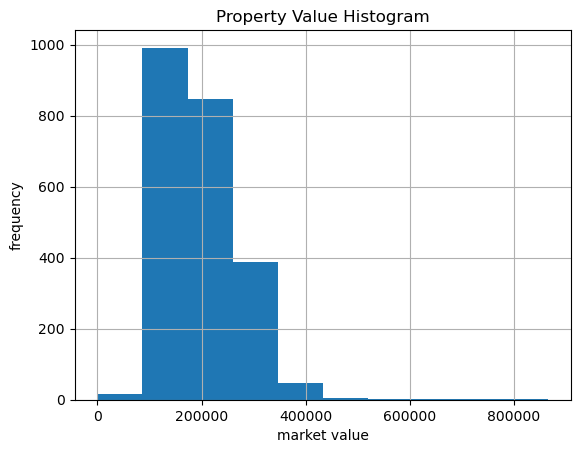

In [12]:
parcels_df['market_value'].hist(bins = 10)
plt.xlabel('market value')
plt.ylabel('frequency')
plt.title('Property Value Histogram')

In [13]:
dark_gray_map = gis.map('Dallas, TX')
dark_gray_map.basemaps
dark_gray_map.basemap = 'dark-gray-vector'
dark_gray_map

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
# Write code to make a new webmap of parcels colored by market value
# Use Class Breaks renderer with esriClassifyNaturalBreaks classification and 7 classes
sdf.spatial.plot(map_widget=dark_gray_map,
                renderer_type='c',
                method='esriClassifyNaturalBreaks',
                class_count=7,
                col="market_value",
                cmap="YlGnBu",
                alpha=0.7)
dark_gray_map.legend = True
dark_gray_map

MapView(layout=Layout(height='400px', width='100%'), legend=True)

### Interactive data visualization

In [15]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge altair vega_datasets

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.2
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - altair
    - vega_datasets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-5.2.0               |     pyhd8ed1ab_0         447 KB  conda-forge
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    mkl-2023.1.0               |   h213fc3f_46344       171.5 MB  defaults
    openssl-3.0.12             |       h7f8727e_0         5.2 MB  defau

In [16]:
import altair as alt
from vega_datasets import data

#Load the dataset
cars = data.cars()

#Create a selection brush
brush = alt.selection(type='interval', resolve='global')

#Create points chart
points = alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(brush)

#Create bars chart
bars = alt.Chart(cars).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(brush)

#Combine points and bars, and add title
combined_chart = (points & bars).properties(
    title='Miles per gallon vs. Horsepower with Origin Distribution'
)

#Show the chart
combined_chart


/opt/conda/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/conda/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.VConcatChart(...)

In [17]:
import vega_datasets

seattle_weather = vega_datasets.data.seattle_weather()

print(seattle_weather)

           date  precipitation  temp_max  temp_min  wind  weather
0    2012-01-01            0.0      12.8       5.0   4.7  drizzle
1    2012-01-02           10.9      10.6       2.8   4.5     rain
2    2012-01-03            0.8      11.7       7.2   2.3     rain
3    2012-01-04           20.3      12.2       5.6   4.7     rain
4    2012-01-05            1.3       8.9       2.8   6.1     rain
...         ...            ...       ...       ...   ...      ...
1456 2015-12-27            8.6       4.4       1.7   2.9      fog
1457 2015-12-28            1.5       5.0       1.7   1.3      fog
1458 2015-12-29            0.0       7.2       0.6   2.6      fog
1459 2015-12-30            0.0       5.6      -1.0   3.4      sun
1460 2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


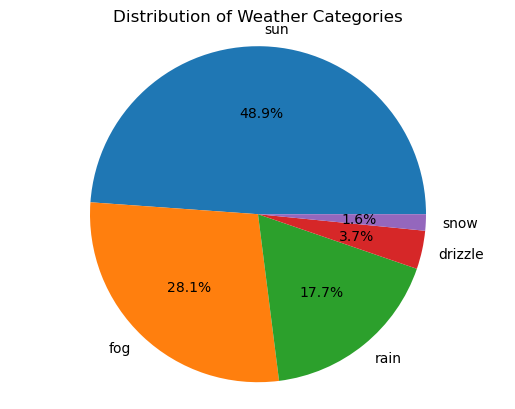

In [18]:
weather_counts = seattle_weather['weather'].value_counts()
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Weather Categories')
plt.axis('equal')
plt.show()

In [19]:
source = data.seattle_weather()
brush = alt.selection_interval(encodings=['x'])
#Make a new dataset just for January data
Jan_df = seattle_weather[:31]

bars = alt.Chart().mark_bar().encode(
    x='date:O',
    y='mean(temp_min):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).add_params(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(temp_min):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=Jan_df)


alt.LayerChart(...)

### Interactive data visualization of Covid-19 dataset

In [20]:
pip install "vegafusion[embed]>=1.4.0"

  Obtaining dependency information for vegafusion[embed]>=1.4.0 from https://files.pythonhosted.org/packages/00/0d/310e23f8c2b5ea801ae0656d11e8d97e7e1ade4e11a0b90a4b300cbd98b6/vegafusion-1.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow>=5 from https://files.pythonhosted.org/packages/f3/7a/58a68be90992ea3c1d7a6b578d7ee8bc103213c4902d10fed25e1845f0d4/pyarrow-15.0.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for vegafusion-python-embed==1.6.1 from https://files.pythonhosted.org/packages/d3/40/4a230bebf11ca420b5a199e3d99a5b1fb28ecd647ba12ba9ebafef032c40/vegafusion_python_embed-1.6.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for vl-convert-python>=0.7.0 from https://files.pythonhosted.org/packages/00/74/6e519803f5d27079a32b2e6231a03a5c44b76531f9061cddfd7971328a98/vl_convert_python-1.2.3-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dep

In [21]:
#Disable data size check
alt.data_transformers.disable_max_rows()
# Load data
cases = pd.read_csv('/arcgis/home/time_series_covid19_confirmed_global_long.csv', low_memory=False)
deaths = pd.read_csv('/arcgis/home/time_series_covid19_deaths_global_long.csv', low_memory=False)
merge_df = pd.merge(cases, deaths, on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
merge_df = merge_df.drop(['Lat', 'Long'], axis=1)

# Slim down the longitudinal data to the top 25
latest = cases[cases['Date']=='9/27/2021']
top_25 = latest.sort_values(by =["Confirmed"], ascending = False)[:25]
list25 = top_25['Country/Region'].tolist()
long25 = merge_df.loc[merge_df['Country/Region'].isin(list25)]

# Create a selection
selection = alt.selection_single(
    fields=['Country/Region']
)

# Create a horizontal bar chart for the top 25 countries/states
bar_chart = alt.Chart(top_25).mark_bar(orient='horizontal').encode(
    x=alt.X('Confirmed:Q', title='Confirmed Cases'),
    y=alt.Y('Country/Region:N', title='Country/Region'),
    color=alt.Color('Country/Region:N', legend=None),
    tooltip=['Country/Region:N', 'Confirmed:Q']
).properties(
    width=600,
    height=400
).add_selection(selection)  # Link the selection to the bar chart

# Create an interactive line chart for total deaths over time
line_chart = alt.Chart(long25).mark_line().encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('sum(Deaths):Q', title='Total Deaths'),
    color=alt.Color('Country/Region:N', legend=None),
    tooltip=['Country/Region:N', 'Date:T', 'sum(Deaths):Q']
).properties(
    width=600,
    height=300
).transform_filter(
    selection  # Filter the data based on the selection
).interactive()

# Combine the bar chart and line chart
final_chart = alt.vconcat(bar_chart, line_chart)

final_chart


/opt/conda/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/conda/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.VConcatChart(...)

## Click on a country's bar graph to see their linear data!